# **Project 2: Data Cleaning and Preparation**
- **Course:** Data Analytics and Business Intelligence Analyst
- **Institution:** Willis College
- **Student Name:** Carlos Reyes
- **Instructor:** Ratinder Rajpal
- **Date:** 2025 Nov, 21

# Project Set Up
1. Import libraries
2. memory optimization fuctions
3. Load dataset
4. Apply memory optimization
5. 5. Data Preprocessing

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os

print("Libraries imported successfully!")


#  MEMORY OPTIMIZATION FUNCTIONS

def reduce_memory_usage(df):
    """
    Optimize memory usage for dataset by downcasting numerical columns
    """
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Initial memory usage: {start_mem:.2f} MB")

    for col in df.columns:
        col_type = df[col].dtype

        if col_type in ['int64', 'int32']:
            c_min = df[col].min()
            c_max = df[col].max()
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                df[col] = df[col].ast(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)

        elif col_type in ['float64']:
            df[col] = df[col].astype(np.float32)

    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Final memory usage: {end_mem:.2f} MB")
    print(f"Memory reduced by {100 * (start_mem - end_mem) / start_mem:.1f}%")

    return df

Libraries imported successfully!


In [5]:
# Create a function to load or convert dataset from csv to parquet 

def load_or_convert_to_parquet():
    """
    Load dataset from Parquet files or convert CSV to Parquet if needed
    Returns stocks_df, prices_df
    """
    stocks_parquet = "historical_stocks.parquet"
    prices_parquet = "historical_stock_prices.parquet"
    
    stocks_csv = "historical_stocks.csv"
    prices_csv = "historical_stock_prices.csv"
    
    # Check if Parquet files exist
    if os.path.exists(stocks_parquet) and os.path.exists(prices_parquet):
        print("Loading data from existing Parquet files...")
        stocks_df = pd.read_parquet(stocks_parquet)
        prices_df = pd.read_parquet(prices_parquet)
    else:
        print("Parquet files not found. Converting CSV to Parquet...")
        
        # Load from CSV
        if os.path.exists(stocks_csv) and os.path.exists(prices_csv):
            stocks_df = pd.read_csv(stocks_csv)
            prices_df = pd.read_csv(prices_csv)
            
            # Convert to Parquet
            stocks_df.to_parquet(stocks_parquet, index=False)
            prices_df.to_parquet(prices_parquet, index=False)
            print("CSV files successfully converted to Parquet format")
        else:
            raise FileNotFoundError("Neither Parquet nor CSV files found. Please ensure historical_stocks.csv and historical_stock_prices.csv exist.")
    
    return stocks_df, prices_df
    

# Load the dataset using Parquet conversion function

print("=" * 50)
print("LOADING DATASET")
print("=" * 50)
stocks_df, prices_df = load_or_convert_to_parquet()


LOADING DATASET
Loading data from existing Parquet files...


In [6]:

# 🚨 APPLY MEMORY OPTIMIZATION TO DATASET

print("\nOptimizing memory usage for dataset...")
prices_df = reduce_memory_usage(prices_df)
stocks_df = reduce_memory_usage(stocks_df)

# Display dataset information
print("\n" + "=" * 50)
print("DATASET BASIC INFORMATION")
print("=" * 50)
print(f"stocks_df: {stocks_df.shape[0]} rows, {stocks_df.shape[1]} columns")
print(f"prices_df: {prices_df.shape[0]} rows, {prices_df.shape[1]} columns")

print("\n=== STOCKS DATASET INFO ===")
print(stocks_df.info())
print("\n=== PRICES DATASET INFO ===")
print(prices_df.info())


Optimizing memory usage for dataset...
Initial memory usage: 3188.35 MB
Final memory usage: 2788.30 MB
Memory reduced by 12.5%
Initial memory usage: 1.82 MB
Final memory usage: 1.82 MB
Memory reduced by 0.0%

DATASET BASIC INFORMATION
stocks_df: 6460 rows, 5 columns
prices_df: 20973889 rows, 8 columns

=== STOCKS DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6460 entries, 0 to 6459
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    6460 non-null   object
 1   exchange  6460 non-null   object
 2   name      6460 non-null   object
 3   sector    5020 non-null   object
 4   industry  5020 non-null   object
dtypes: object(5)
memory usage: 252.5+ KB
None

=== PRICES DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20973889 entries, 0 to 20973888
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ticker     object 
 1   open       float32
 2   clos

In [7]:

# DATASET PREPROCESSING

print("\n" + "=" * 50)
print("DATASET PREPROCESSING")
print("=" * 50)

# Clean and convert date column
print("Cleaning date column...")
prices_df['date'] = prices_df['date'].astype(str).str.strip()
prices_df['date'] = pd.to_datetime(prices_df['date'], errors='coerce')

# Check for bad date conversions
bad_dates = prices_df['date'].isna().sum()
print(f"Rows with bad date format: {bad_dates}")

# Remove invalid dates
prices_df = prices_df.dropna(subset=['date'])
print(f"Prices dataset after removing bad dates: {prices_df.shape}")

# Apply memory optimization after date processing
prices_df = reduce_memory_usage(prices_df)

# Merge dataset components
print("\nMerging dataset components...")
merged = prices_df.merge(stocks_df, on="ticker", how="left")
merged.index = prices_df.index

print(f"Merged dataset shape: {merged.shape}")

# Optimize memory after merging
print("Optimizing memory after merging...")
merged = reduce_memory_usage(merged)

print("\nMerged dataset preview:")
display(merged.head())


DATASET PREPROCESSING
Cleaning date column...
Rows with bad date format: 0
Prices dataset after removing bad dates: (20973889, 8)
Initial memory usage: 1768.19 MB
Final memory usage: 1768.19 MB
Memory reduced by 0.0%

Merging dataset components...
Merged dataset shape: (20973889, 12)
Optimizing memory after merging...
Initial memory usage: 6774.53 MB
Final memory usage: 6774.53 MB
Memory reduced by 0.0%

Merged dataset preview:


,ticker,open,close,adj_close,low,high,volume,date,exchange,name,sector,industry
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE


# **1. Advanced Data Cleaning**
1. Handle Missing Values: Employ advanced imputation techniques where appropriate, such as interpolation, using backward or forward filling, or model-based imputation.
2. Detect and Resolve Outliers: Apply robust methods to detect outliers in critical variables such as close prices and volume. Decide on a strategy to manage these outliers, whether it be removal, capping, or correction.
3. Error Identification and Correction: Scan the dataset for errors introduced either through data entry or during initial data collection. Correct these errors to ensure data integrity.


In [8]:
# ================================================================
# STEP 1: ADVANCED DATA CLEANING
# ================================================================
print("\n" + "=" * 50)
print("STEP 1: ADVANCED DATA CLEANING")
print("=" * 50)

# ---
# 2.1 MISSING VALUE HANDLING
# ---
print("2.1 Handling Missing Values...")

# Check missing values before cleaning
print("\nMissing values BEFORE cleaning:")
missing_before = merged.isnull().sum()
print(missing_before[missing_before > 0])

# Forward fill numeric columns
num_cols = merged.select_dtypes(include=[np.number]).columns
print(f"\nNumeric columns to interpolate: {list(num_cols)}")

merged[num_cols] = merged[num_cols].interpolate(method='linear')

# Fill categorical missing values
cat_cols = merged.select_dtypes(include=['object']).columns
print(f"Categorical columns to fill: {list(cat_cols)}")

merged[cat_cols] = merged[cat_cols].fillna("Unknown")

print("\nMissing values AFTER cleaning:")
missing_after = merged.isnull().sum()
print(missing_after[missing_after > 0])


STEP 1: ADVANCED DATA CLEANING
2.1 Handling Missing Values...

Missing values BEFORE cleaning:
sector      2549449
industry    2549449
dtype: int64

Numeric columns to interpolate: ['open', 'close', 'adj_close', 'low', 'high', 'volume']
Categorical columns to fill: ['ticker', 'exchange', 'name', 'sector', 'industry']

Missing values AFTER cleaning:
Series([], dtype: int64)


In [9]:
# 2.2 OUTLIER DETECTION & HANDLING
# ---
print("\n2.2 Detecting and Handling Outliers...")

def remove_outliers_iqr(df, column):
    """Remove outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"Outliers detected in {column}: {len(outliers)}")
    
    return df[(df[column] >= lower) & (df[column] <= upper)]

print(f"Dataset shape before outlier removal: {merged.shape}")

# Remove outliers
merged = remove_outliers_iqr(merged, 'close')
merged = remove_outliers_iqr(merged, 'volume')

print(f"Dataset shape after outlier removal: {merged.shape}")

# Optimize memory after outlier removal
merged = reduce_memory_usage(merged)

# Show statistics for cleaned dataset
print("\nBasic statistics after outlier removal:")
display(merged[['close', 'volume']].describe())


2.2 Detecting and Handling Outliers...
Dataset shape before outlier removal: (20973889, 12)
Outliers detected in close: 1694375
Outliers detected in volume: 2721696
Dataset shape after outlier removal: (16557818, 12)
Initial memory usage: 5597.39 MB
Final memory usage: 5534.22 MB
Memory reduced by 1.1%

Basic statistics after outlier removal:


,close,volume
count,1.655782e+07,1.655782e+07
mean,1.706231e+01,2.155900e+05
std,1.343472e+01,3.022741e+05
min,3.000000e-04,1.000000e+00
25%,6.650000e+00,1.650000e+04
50%,1.362000e+01,7.760000e+04
75%,2.398000e+01,2.844000e+05
max,6.304890e+01,1.388900e+06


In [10]:
# 2.3 ERROR IDENTIFICATION
# ---
print("\n2.3 Error Identification and Correction...")

# Check for negative values
print("Negative values BEFORE correction:")
negative_before = (merged[['open', 'high', 'low', 'close', 'volume']] < 0).sum()
print(negative_before)

# Correct negative values
for col in ['open', 'high', 'low', 'close', 'volume']:
    negative_count = (merged[col] < 0).sum()
    if negative_count > 0:
        print(f"Correcting {negative_count} negative values in {col}")
        merged.loc[merged[col] < 0, col] = np.nan
        merged[col] = merged[col].interpolate()

print("\nNegative values AFTER correction:")
negative_after = (merged[['open', 'high', 'low', 'close', 'volume']] < 0).sum()
print(negative_after)

# Optimize memory after error correction
merged = reduce_memory_usage(merged)

print("\nDataset preview after advanced cleaning:")
display(merged.tail())


2.3 Error Identification and Correction...
Negative values BEFORE correction:
open      0
high      0
low       0
close     0
volume    0
dtype: int64

Negative values AFTER correction:
open      0
high      0
low       0
close     0
volume    0
dtype: int64
Initial memory usage: 5534.22 MB
Final memory usage: 5534.22 MB
Memory reduced by 0.0%

Dataset preview after advanced cleaning:


,ticker,open,close,adj_close,low,high,volume,date,exchange,name,sector,industry
20973884,NZF,14.60,14.59,14.59,14.58,14.62,137500,2018-08-20,NYSE,NUVEEN MUNICIPAL CREDIT INCOME FUND,Unknown,Unknown
20973885,NZF,14.60,14.58,14.58,14.57,14.61,151200,2018-08-21,NYSE,NUVEEN MUNICIPAL CREDIT INCOME FUND,Unknown,Unknown
20973886,NZF,14.58,14.59,14.59,14.57,14.63,185400,2018-08-22,NYSE,NUVEEN MUNICIPAL CREDIT INCOME FUND,Unknown,Unknown
20973887,NZF,14.60,14.57,14.57,14.57,14.64,135600,2018-08-23,NYSE,NUVEEN MUNICIPAL CREDIT INCOME FUND,Unknown,Unknown
20973888,NZF,14.60,14.69,14.69,14.59,14.69,180900,2018-08-24,NYSE,NUVEEN MUNICIPAL CREDIT INCOME FUND,Unknown,Unknown


# 2. Data Transformation
1. Feature Engineering: Create new features that could enhance the model’s predictive power. This includes rolling averages, volatility measures, and technical indicators.
2. Data Normalization/Standardization: Standardize or normalize numerical fields to ensure that model inputs have similar scales.
3. Encoding Categorical Variables: Apply appropriate encoding techniques such as one-hot encoding for categorical data.


In [11]:
# ================================================================
# STEP 2: FEATURE ENGINEERING
# ================================================================
print("\n" + "=" * 50)
print("STEP 2: FEATURE ENGINEERING")
print("=" * 50)

# ---
# 3.1 FEATURE ENGINEERING
# ---
print("3.1 Creating New Features...")

# Create copy for feature engineering
merged = merged.copy()

# Create technical indicators
print("Creating rolling averages and volatility measures...")
merged['ma_7'] = merged.groupby('ticker')['close'].rolling(7).mean().reset_index(0, drop=True)
merged['ma_30'] = merged.groupby('ticker')['close'].rolling(30).mean().reset_index(0, drop=True)
merged['volatility_30'] = merged.groupby('ticker')['close'].rolling(30).std().reset_index(0, drop=True)

# Create returns
print("Creating daily returns...")
merged['daily_return'] = merged.groupby('ticker')['close'].pct_change()

# Create target variable
print("Creating future price target...")
merged['future_close_7'] = merged.groupby('ticker')['close'].shift(-7)

# Optimize memory after feature engineering
merged = reduce_memory_usage(merged)

print("Feature engineering completed!")
print(f"New features created: ma_7, ma_30, volatility_30, daily_return, future_close_7")

print("\nDataset with engineered features:")
display(merged.head())


STEP 2: FEATURE ENGINEERING
3.1 Creating New Features...
Creating rolling averages and volatility measures...
Creating daily returns...
Creating future price target...
Initial memory usage: 6039.53 MB
Final memory usage: 5850.04 MB
Memory reduced by 3.1%
Feature engineering completed!
New features created: ma_7, ma_30, volatility_30, daily_return, future_close_7

Dataset with engineered features:


,ticker,open,close,adj_close,low,high,volume,date,exchange,name,sector,industry,ma_7,ma_30,volatility_30,daily_return,future_close_7
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE,NaN,NaN,NaN,NaN,11.73
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE,NaN,NaN,NaN,0.004329,11.83
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE,NaN,NaN,NaN,0.004310,11.75
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE,NaN,NaN,NaN,-0.010300,11.61
5,AHH,11.60,11.60,8.507822,11.54,11.60,76800,2013-05-15,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE,NaN,NaN,NaN,0.006071,11.70


In [12]:
# 3.2 DATA STANDARDIZATION
# ---
print("\n3.2 Data Standardization...")

# Handle remaining NaN values
merged = merged.fillna(method='bfill').fillna(method='ffill')

# Initialize scaler
scaler = StandardScaler()

# Columns to standardize
scaled_cols = ['open', 'high', 'low', 'close', 'volume', 'ma_7', 'ma_30', 'volatility_30', 'daily_return']
available_scaled_cols = [col for col in scaled_cols if col in merged.columns]

print(f"Columns to standardize: {available_scaled_cols}")

# Apply standardization
merged[available_scaled_cols] = scaler.fit_transform(merged[available_scaled_cols])

print("Standardization completed!")

# Optimize memory after standardization
merged = reduce_memory_usage(merged)

print("\nStandardized data statistics:")
display(merged[available_scaled_cols].describe())



3.2 Data Standardization...


C:\Users\arlyn\AppData\Local\Temp\ipykernel_23144\3369953416.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged = merged.fillna(method='bfill').fillna(method='ffill')


Columns to standardize: ['open', 'high', 'low', 'close', 'volume', 'ma_7', 'ma_30', 'volatility_30', 'daily_return']
Standardization completed!
Initial memory usage: 6418.51 MB
Final memory usage: 5850.04 MB
Memory reduced by 8.9%

Standardized data statistics:


,open,high,low,close,volume,ma_7,ma_30,volatility_30,daily_return
count,1.655782e+07,1.655782e+07,1.655782e+07,1.655782e+07,1.655782e+07,1.655782e+07,1.655782e+07,1.655782e+07,1.655782e+07
mean,-9.248635e-09,-7.453463e-09,-7.630400e-10,1.680900e-09,2.234749e-09,1.752780e-09,1.632979e-09,2.211710e-10,-1.350497e-10
std,9.841058e-01,9.839483e-01,9.839976e-01,9.840419e-01,9.601591e-01,9.840427e-01,9.841172e-01,9.621807e-01,9.999931e-01
min,-1.252812e+00,-1.254496e+00,-1.250881e+00,-1.253660e+00,-7.132236e-01,-1.255517e+00,-1.260677e+00,-7.636924e-01,-7.849053e-02
25%,-7.651123e-01,-7.641723e-01,-7.667751e-01,-7.650626e-01,-6.586407e-01,-7.657334e-01,-7.672461e-01,-5.521033e-01,-2.361368e-03
50%,-2.528700e-01,-2.545098e-01,-2.515985e-01,-2.529304e-01,-4.565063e-01,-2.529516e-01,-2.523047e-01,-3.005680e-01,-1.537824e-03
75%,5.080421e-01,5.047479e-01,5.071294e-01,5.082875e-01,2.276409e-01,5.079761e-01,5.106575e-01,1.798509e-01,-7.132671e-04
max,4.720392e+01,7.481628e+01,7.534698e+01,3.378939e+00,3.881609e+00,3.383756e+00,3.395644e+00,2.825623e+01,2.966676e+03


In [13]:
# 3.3 CATEGORICAL ENCODING
# ---
print("\n3.3 Encoding Categorical Variables...")

# Identify categorical features
cat_features = ['sector', 'industry', 'exchange', 'name']
available_cat_features = [col for col in cat_features if col in merged.columns]

print(f"Categorical features to encode: {available_cat_features}")

# Reduce category cardinality
print("\nReducing category cardinality...")

for col in available_cat_features:
    if col in merged.columns:
        # Count frequency
        value_counts = merged[col].value_counts()
        print(f"\n{col}: {len(value_counts)} unique values")
        
        # Keep top categories, group others
        top_categories = value_counts.head(20).index
        merged[col] = merged[col].apply(lambda x: x if x in top_categories else 'Other')
        
        print(f"After reduction: {merged[col].nunique()} unique values")

# Perform one-hot encoding
print("\nPerforming one-hot encoding...")
merged_encoded = pd.get_dummies(merged, columns=available_cat_features, drop_first=True)

print(f"Dataset shape before encoding: {merged.shape}")
print(f"Dataset shape after encoding: {merged_encoded.shape}")
print(f"New columns added: {merged_encoded.shape[1] - merged.shape[1]}")

# Optimize memory after encoding
merged_encoded = reduce_memory_usage(merged_encoded)

print("\nEncoded dataset preview:")
display(merged_encoded.head())



3.3 Encoding Categorical Variables...
Categorical features to encode: ['sector', 'industry', 'exchange', 'name']

Reducing category cardinality...

sector: 13 unique values
After reduction: 13 unique values

industry: 136 unique values
After reduction: 21 unique values

exchange: 2 unique values
After reduction: 2 unique values

name: 5332 unique values
After reduction: 21 unique values

Performing one-hot encoding...
Dataset shape before encoding: (16557818, 17)
Dataset shape after encoding: (16557818, 66)
New columns added: 49
Initial memory usage: 2612.54 MB
Final memory usage: 2612.54 MB
Memory reduced by 0.0%

Encoded dataset preview:


,ticker,open,close,adj_close,low,high,volume,date,ma_7,ma_30,...,name_LEHMAN ABS CORPORATION,"name_MATSON, INC.",name_NATIONAL FUEL GAS COMPANY,name_Other,"name_PHI, INC.","name_SELECTIVE INSURANCE GROUP, INC.",name_SPARTON CORPORATION,"name_TELEPHONE AND DATA SYSTEMS, INC.",name_TUTOR PERINI CORPORATION,name_URSTADT BIDDLE PROPERTIES INC.
1,AHH,-0.396772,-0.405027,8.471151,-0.395684,-0.408972,0.199190,2013-05-09,-0.39893,-0.403874,...,False,False,False,True,False,False,False,False,False,False
2,AHH,-0.404848,-0.401353,8.507822,-0.395684,-0.413323,0.203491,2013-05-10,-0.39893,-0.403874,...,False,False,False,True,False,False,False,False,False,False
3,AHH,-0.398975,-0.397679,8.544494,-0.391966,-0.409697,-0.225590,2013-05-13,-0.39893,-0.403874,...,False,False,False,True,False,False,False,False,False,False
4,AHH,-0.401177,-0.406497,8.456484,-0.395684,-0.413323,-0.104177,2013-05-14,-0.39893,-0.403874,...,False,False,False,True,False,False,False,False,False,False
5,AHH,-0.401177,-0.401353,8.507822,-0.392710,-0.413323,-0.459153,2013-05-15,-0.39893,-0.403874,...,False,False,False,True,False,False,False,False,False,False


# 3. Integration and Formatting for Modeling
1. Consolidate Data: Ensure all data transformations and cleanings are integrated into a single, coherent dataset ready for analysis.
2. Data Splitting: Prepare the data for predictive modeling by splitting it into training, validation, and test sets.
3. Save clean data: Save cleaned data and the splits for future use.


In [14]:
# ================================================================
# STEP 3: FINAL DATASET PREPARATION
# ================================================================
print("\n" + "=" * 50)
print("STEP 3: FINAL DATASET PREPARATION")
print("=" * 50)

# ---
# 4.1 CONSOLIDATE FINAL DATASET
# ---
print("4.1 Consolidating Final Dataset...")

# Create final dataset
clean_df = merged_encoded.copy()

# Remove rows with missing target
clean_df = clean_df.dropna(subset=['future_close_7'])

# Final memory optimization
clean_df = reduce_memory_usage(clean_df)

print(f"Final dataset shape: {clean_df.shape}")
print(f"Columns in final dataset: {len(clean_df.columns)}")

print("\nFinal dataset information:")
print(clean_df.info())

# Show column types
print("\nFinal dataset column types summary:")
print(clean_df.dtypes.value_counts())



STEP 3: FINAL DATASET PREPARATION
4.1 Consolidating Final Dataset...
Initial memory usage: 2612.54 MB
Final memory usage: 2612.54 MB
Memory reduced by 0.0%
Final dataset shape: (16557818, 66)
Columns in final dataset: 66

Final dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 16557818 entries, 1 to 20973888
Data columns (total 66 columns):
 #   Column                                            Dtype         
---  ------                                            -----         
 0   ticker                                            object        
 1   open                                              float32       
 2   close                                             float32       
 3   adj_close                                         float32       
 4   low                                               float32       
 5   high                                              float32       
 6   volume                                            float32       
 7   date 

In [15]:
# 4.2 DATA SPLITTING
# ---
print("\n4.2 Data Splitting for Model Training...")

# Prepare features and target
exclude_columns = ['future_close_7', 'date', 'ticker']
feature_columns = [col for col in clean_df.columns if col not in exclude_columns]

X = clean_df[feature_columns]
y = clean_df['future_close_7']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Number of features: {len(feature_columns)}")

# Split for time series analysis
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, shuffle=False, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, shuffle=False, random_state=42
)

# Optimize memory for dataset splits
X_train = reduce_memory_usage(X_train)
X_val = reduce_memory_usage(X_val)
X_test = reduce_memory_usage(X_test)
y_train = reduce_memory_usage(pd.DataFrame(y_train))
y_val = reduce_memory_usage(pd.DataFrame(y_val))
y_test = reduce_memory_usage(pd.DataFrame(y_test))

print("\n" + "=" * 50)
print("DATASET SPLIT SUMMARY")
print("=" * 50)
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")
print(f"Total samples: {len(X_train) + len(X_val) + len(X_test)}")

# Display date ranges
if 'date' in clean_df.columns:
    print("\n=== DATE RANGES ===")
    train_dates = clean_df.loc[X_train.index, 'date']
    val_dates = clean_df.loc[X_val.index, 'date'] 
    test_dates = clean_df.loc[X_test.index, 'date']
    
    print(f"Training period: {train_dates.min()} to {train_dates.max()}")
    print(f"Validation period: {val_dates.min()} to {val_dates.max()}")
    print(f"Testing period: {test_dates.min()} to {test_dates.max()}")


4.2 Data Splitting for Model Training...
Feature matrix shape: (16557818, 63)
Target vector shape: (16557818,)
Number of features: 63
Initial memory usage: 1116.41 MB
Final memory usage: 1116.41 MB
Memory reduced by 0.0%
Initial memory usage: 239.23 MB
Final memory usage: 239.23 MB
Memory reduced by 0.0%
Initial memory usage: 239.23 MB
Final memory usage: 239.23 MB
Memory reduced by 0.0%
Initial memory usage: 132.64 MB
Final memory usage: 132.64 MB
Memory reduced by 0.0%
Initial memory usage: 28.42 MB
Final memory usage: 28.42 MB
Memory reduced by 0.0%
Initial memory usage: 28.42 MB
Final memory usage: 28.42 MB
Memory reduced by 0.0%

DATASET SPLIT SUMMARY
Training set: (11590472, 63)
Validation set: (2483673, 63)
Test set: (2483673, 63)
Total samples: 16557818

=== DATE RANGES ===
Training period: 1970-01-02 00:00:00 to 2018-08-24 00:00:00
Validation period: 1970-01-02 00:00:00 to 2018-08-24 00:00:00
Testing period: 1970-01-02 00:00:00 to 2018-08-24 00:00:00


In [17]:
# ================================================================
# STEP 4: SAVE PROCESSED DATASET
# ================================================================
print("\n" + "=" * 50)
print("STEP 4: SAVE PROCESSED DATASET")
print("=" * 50)

def save_dataframe_parquet(df, filename_base, description=""):
    """
    Save dataset in Parquet format
    """
    parquet_filename = f"{filename_base}.parquet"
    
    print(f"Saving {description}...")
    
    # Save as Parquet - data is already optimized from previous steps
    if hasattr(df, 'to_parquet'):
        df.to_parquet(parquet_filename, index=True)
    else:
        # Handle Series objects by converting to DataFrame
        pd.DataFrame(df).to_parquet(parquet_filename, index=True)
    
    parquet_size = os.path.getsize(parquet_filename) / (1024 * 1024)
    
    print(f"  ✅ {parquet_filename}: {parquet_size:.2f} MB")
    
    return parquet_size

# Save all dataset components
print("\n4.3 Saving Dataset Components...")

total_parquet_size = 0

# Save main dataset
parquet_size = save_dataframe_parquet(clean_df, "clean_stock_data", "main processed dataset")
total_parquet_size += parquet_size

# Save dataset splits
parquet_size = save_dataframe_parquet(X_train, "train_X", "training features")
total_parquet_size += parquet_size

parquet_size = save_dataframe_parquet(y_train, "train_y", "training target")
total_parquet_size += parquet_size

parquet_size = save_dataframe_parquet(X_val, "val_X", "validation features")
total_parquet_size += parquet_size

parquet_size = save_dataframe_parquet(y_val, "val_y", "validation target")
total_parquet_size += parquet_size

parquet_size = save_dataframe_parquet(X_test, "test_X", "test features")
total_parquet_size += parquet_size

parquet_size = save_dataframe_parquet(y_test, "test_y", "test target")
total_parquet_size += parquet_size

# Save feature names - FIXED: Convert Series to DataFrame
print("Saving feature names...")
feature_names = pd.DataFrame({'feature_names': X.columns.tolist()})
feature_names.to_parquet("feature_names.parquet", index=False)
feature_size = os.path.getsize("feature_names.parquet") / (1024 * 1024)
print(f"  ✅ feature_names.parquet: {feature_size:.2f} MB")
total_parquet_size += feature_size

print("\n" + "=" * 50)
print("DATASET SAVING COMPLETE")
print("=" * 50)
print(f"Total dataset size: {total_parquet_size:.2f} MB")

print("\nSaved dataset files:")
print("  ✅ clean_stock_data.parquet - Complete processed dataset")
print("  ✅ train_X.parquet, train_y.parquet - Training dataset")
print("  ✅ val_X.parquet, val_y.parquet - Validation dataset") 
print("  ✅ test_X.parquet, test_y.parquet - Test dataset")
print("  ✅ feature_names.parquet - Feature names")


STEP 4: SAVE PROCESSED DATASET

4.3 Saving Dataset Components...
Saving main processed dataset...
  ✅ clean_stock_data.parquet: 623.89 MB
Saving training features...
  ✅ train_X.parquet: 389.23 MB
Saving training target...
  ✅ train_y.parquet: 71.81 MB
Saving validation features...
  ✅ val_X.parquet: 84.48 MB
Saving validation target...
  ✅ val_y.parquet: 15.63 MB
Saving test features...
  ✅ test_X.parquet: 82.02 MB
Saving test target...
  ✅ test_y.parquet: 15.32 MB
Saving feature names...
  ✅ feature_names.parquet: 0.00 MB

DATASET SAVING COMPLETE
Total dataset size: 1282.37 MB

Saved dataset files:
  ✅ clean_stock_data.parquet - Complete processed dataset
  ✅ train_X.parquet, train_y.parquet - Training dataset
  ✅ val_X.parquet, val_y.parquet - Validation dataset
  ✅ test_X.parquet, test_y.parquet - Test dataset
  ✅ feature_names.parquet - Feature names



DATASET VISUALIZATION


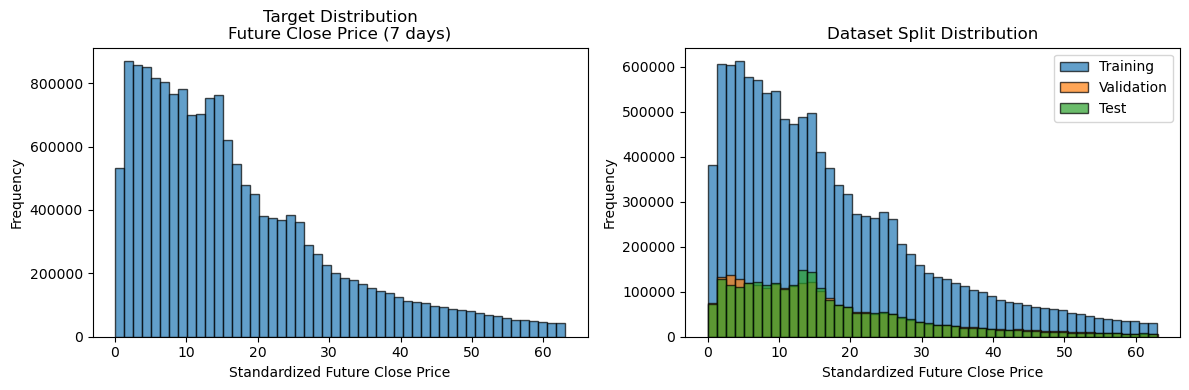


DATASET PROCESSING COMPLETED SUCCESSFULLY! 🎉


In [18]:
# ================================================================
# DATASET VISUALIZATION
# ================================================================
print("\n" + "=" * 50)
print("DATASET VISUALIZATION")
print("=" * 50)

# Visualize target distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y, bins=50, alpha=0.7, edgecolor='black')
plt.title('Target Distribution\nFuture Close Price (7 days)')
plt.xlabel('Standardized Future Close Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y_train, bins=50, alpha=0.7, label='Training', edgecolor='black')
plt.hist(y_val, bins=50, alpha=0.7, label='Validation', edgecolor='black')
plt.hist(y_test, bins=50, alpha=0.7, label='Test', edgecolor='black')
plt.title('Dataset Split Distribution')
plt.xlabel('Standardized Future Close Price')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

print("\n" + "=" * 50)
print("DATASET PROCESSING COMPLETED SUCCESSFULLY! 🎉")
print("=" * 50)